<a href="https://colab.research.google.com/github/robitussin/CCDEPLRL_EXERCISES/blob/main/exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [82]:
#rm -rf fruits

In [83]:
#!unzip fruits.zip

Import the libraries

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [85]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [86]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/train", # Changed from fruits/fruits/test to fruits/fruits/train
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/validation", # Changed from fruits/fruits/train to fruits/fruits/validation
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/fruits/test", # Changed from fruits/fruits/validation to fruits/fruits/test
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1460 files belonging to 4 classes.
Found 1066 files belonging to 4 classes.
Found 1130 files belonging to 4 classes.


Display sample images from the dataset

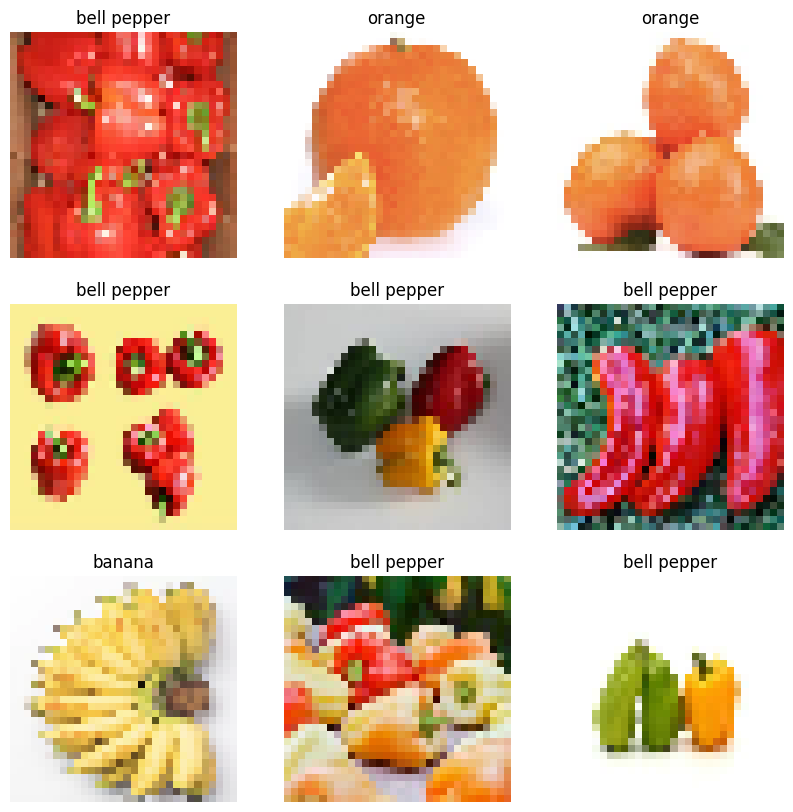

In [87]:
class_names = ["apple", "banana","bell pepper", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [88]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)


Define the optimizer and loss function

In [89]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [90]:

model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15
)

Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6654 - loss: 0.9291 - val_accuracy: 0.9531 - val_loss: 0.1372
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8398 - loss: 0.4023 - val_accuracy: 0.9672 - val_loss: 0.0842
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8920 - loss: 0.2817 - val_accuracy: 0.9653 - val_loss: 0.0856
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9186 - loss: 0.2093 - val_accuracy: 0.9803 - val_loss: 0.0601
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9529 - loss: 0.1391 - val_accuracy: 0.9878 - val_loss: 0.0329
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9589 - loss: 0.1267 - val_accuracy: 0.9841 - val_loss: 0.0465
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9660 - loss: 0.0864 - val_accuracy: 0.9944 - val_loss: 0.0216
Epoch 8/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9734 - loss: 0.0782 - val_accuracy: 0.9906 - v

Test the model

In [91]:
model.evaluate(test_ds)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9978 - loss: 0.0097


[0.011322260834276676, 0.9964601993560791]

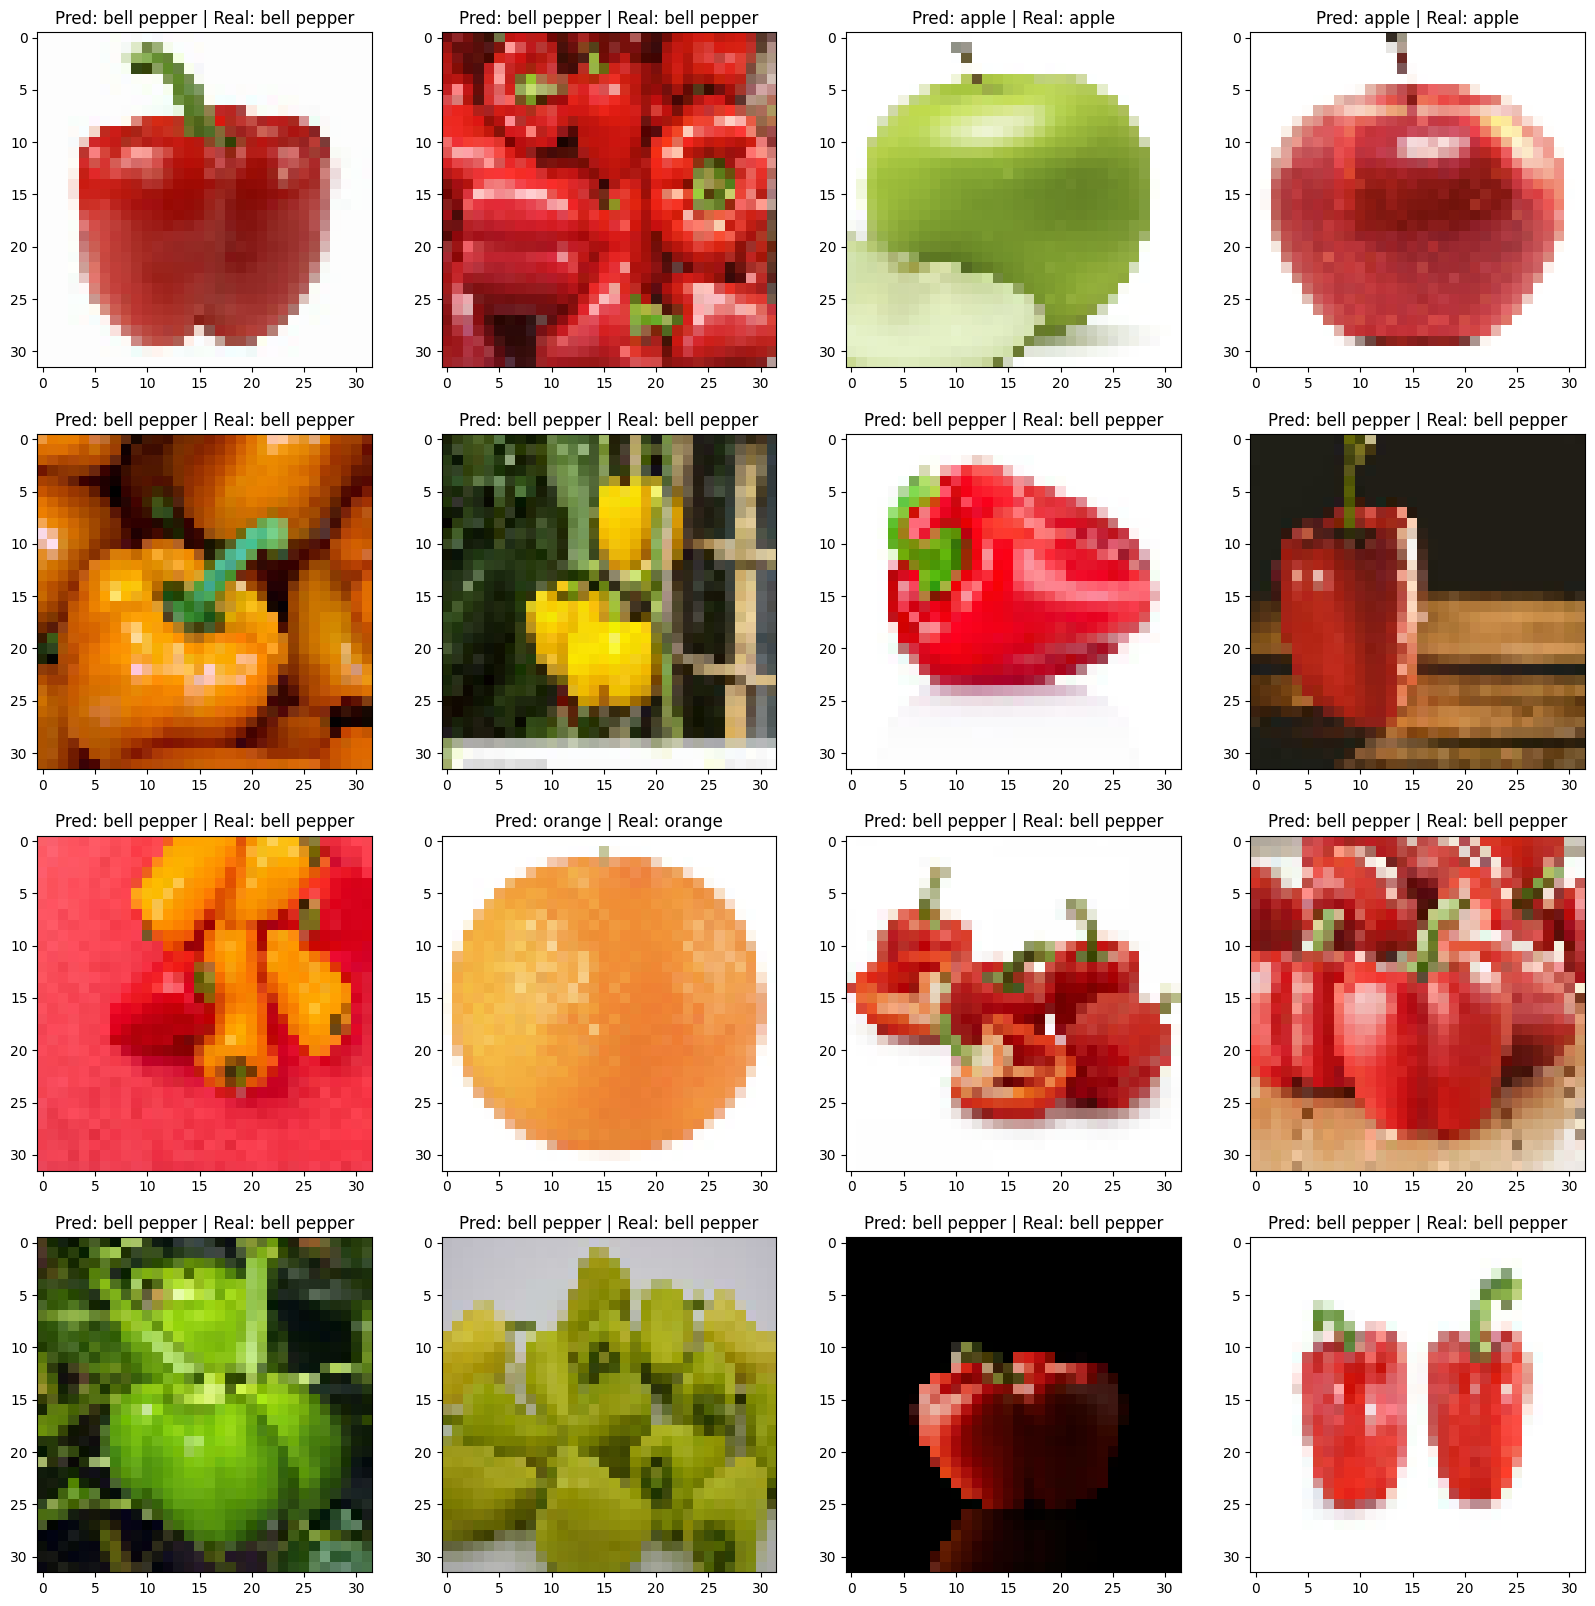

In [101]:
import numpy

plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

   # Changed loop to iterate 16 times instead of 20 to match 4x4 grid
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)  # Changed to start index from 1
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [93]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

#with open("model.tflite", 'wb') as f:
 # f.write(tflite_model)

In [102]:
model.save('fruit.keras')